In [5]:
import tensorflow as tf
import numpy as np
a = tf.cast([1, 2], dtype = tf.float32)
a = tf.reshape(a, (-1, 1))

In [6]:
x = tf.cast(np.random.normal(size=(10, 2)), dtype=tf.float32)


In [13]:
logits = x @ a
probs = tf.exp(logits) / (1 + tf.exp(logits))

In [14]:
tf.concat([probs, 1-probs], axis= 1)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[0.02894572, 0.97105426],
       [0.7119273 , 0.2880727 ],
       [0.11801468, 0.8819853 ],
       [0.8809856 , 0.11901438],
       [0.4200891 , 0.5799109 ],
       [0.3149579 , 0.68504214],
       [0.3377741 , 0.6622259 ],
       [0.84252274, 0.15747726],
       [0.21136895, 0.7886311 ],
       [0.7473265 , 0.2526735 ]], dtype=float32)>

In [15]:
probs

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.02894572],
       [0.7119273 ],
       [0.11801468],
       [0.8809856 ],
       [0.4200891 ],
       [0.3149579 ],
       [0.3377741 ],
       [0.84252274],
       [0.21136895],
       [0.7473265 ]], dtype=float32)>

In [16]:
logits

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-3.51296   ],
       [ 0.90476286],
       [-2.0113664 ],
       [ 2.0017962 ],
       [-0.32240772],
       [-0.77704144],
       [-0.6732295 ],
       [ 1.6771199 ],
       [-1.3166933 ],
       [ 1.0844039 ]], dtype=float32)>

In [17]:
x 

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 0.2693168 , -1.8911383 ],
       [ 0.9198729 , -0.00755502],
       [-0.34966707, -0.8308497 ],
       [ 0.3362664 ,  0.83276486],
       [ 1.4953445 , -0.9088761 ],
       [-0.30576265, -0.2356394 ],
       [ 0.06781466, -0.37052208],
       [ 1.2065172 ,  0.23530132],
       [-0.7051262 , -0.30578354],
       [ 1.0179478 ,  0.03322802]], dtype=float32)>

In [18]:
tf.norm(x, axis = 1)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.9102187 , 0.919904  , 0.9014312 , 0.8980937 , 1.7498889 ,
       0.38602683, 0.37667686, 1.2292479 , 0.76857436, 1.01849   ],
      dtype=float32)>

In [1]:
import generate_data
generate_data.get_data()


In [1]:
import loss_ratio
import numpy as np
import tensorflow as tf
#loss_ratio.mean_ratio([1, 1], [1, 1], num_steps=10)

In [30]:
theta = [2, 1]
fair_direction = [0, 1]
x, y = np.load('data/x.npy'), np.load('data/y.npy')
x, y = tf.cast(x, dtype = tf.float32), y.astype('int32')


In [31]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [32]:
y = tf.one_hot(y, 2)

cl = loss_ratio.linear_classifier(theta)
while np.linalg.norm(fair_direction) != 1:
    fair_direction = fair_direction / np.linalg.norm(fair_direction)
fair_metric = loss_ratio.fair_metric_fn(fair_direction)
    

((11, 11), (11, 11))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
theta1 = np.arange(0, 10.1, step = 0.5)
theta2 = np.arange(0, 4.1, step= 0.4)
T1, T2 = np.meshgrid(theta1, theta2)
#T1, T2 = T1.flatten(), T2.flatten()
T1.shape, T2.shape 

((11, 21), (11, 21))

In [3]:

fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, figsize = [15, 4])
b = np.load('data/mean_ratio_0.npy')
im0 = ax0.pcolormesh(T2, T1, b, shading='gouraud')
ax0.set_title('Rotation $0^O$')
ax0.set_xlabel('$\\theta_1$')
ax0.set_ylabel('$\\theta_2$')
fig.colorbar(im0, ax=ax0)
b = np.load('data/mean_ratio_10.npy')
im1 = ax1.pcolormesh(T2, T1, b, shading='gouraud')
ax1.set_title('Rotation $10^O$')
ax1.set_xlabel('$\\theta_1$')
ax1.set_ylabel('$\\theta_2$')
fig.colorbar(im1, ax=ax1)
b = np.load('data/mean_ratio_20.npy')
im2 = ax2.pcolormesh(T2, T1, b, shading='gouraud')
ax2.set_title('Rotation $20^O$')
ax2.set_xlabel('$\\theta_1$')
ax2.set_ylabel('$\\theta_2$')
fig.colorbar(im2, ax=ax2)


TypeError: Dimensions of C (21, 21) are incompatible with X (21) and/or Y (11); see help(pcolormesh)

In [74]:
b

array([[1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 1.       , 1.       , 1.       ],
       [1.032299 , 1.0318509, 1.0316201, 1.0314293, 1.0308888, 1.0295008,
        1.026972 , 1.0234706, 1.0195453, 1.0158451, 1.0127759],
       [1.117381 , 1.1160606, 1.114495 , 1.1122953, 1.1087112, 1.1028106,
        1.0938706, 1.0823588, 1.0701835, 1.0585479, 1.0480318],
       [1.2178062, 1.2155837, 1.2120289, 1.2065752, 1.1984893, 1.1871172,
        1.1730132, 1.1563338, 1.1380198, 1.1196905, 1.1036475],
       [1.3053092, 1.3019873, 1.2975427, 1.2906048, 1.2799404, 1.2640054,
        1.2426223, 1.2232627, 1.2053987, 1.1790435, 1.159702 ],
       [1.3796533, 1.3757592, 1.3714654, 1.3638304, 1.3518841, 1.334877 ,
        1.3052084, 1.2717112, 1.250569 , 1.2427663, 1.2159364],
       [1.4483159, 1.4462515, 1.4414421, 1.4299858, 1.4139441, 1.4006582,
        1.3740287, 1.3229051, 1.2830108, 1.2587767, 1.2587619],
       [1.5116147, 1.5168897, 1.51

In [26]:
import numpy as np
import tensorflow as tf
import utils
import itertools
import multiprocessing as mp
from functools import partial

def linear_classifier(theta):
    theta = tf.cast(theta, dtype = tf.float32)
    theta = tf.reshape(theta, (-1, 1))
    def classifier(x):
        logits = x @ theta
        probs = 1 / (1 + tf.exp(-logits))
        return tf.concat([1-probs, probs], axis= 1)
    return classifier


def fair_metric_fn(theta):
    theta = tf.cast(theta, dtype = tf.float32)
    theta = tf.reshape(theta, (-1, 1))
    def fair_metric(x):
        return tf.norm(x @ theta, axis = 1)
    return fair_metric

def sample_perturbation(x, y, classifier, fair_metric, regularizer = 5, learning_rate = 2e-2, num_steps = 200):
    x = tf.reshape(x, (1, -1))
    y = tf.reshape(y, (1, -1))
    x_start = x
    x_fair = x
    #x += tf.cast(np.random.normal(size=(1, 39)), dtype = tf.float32)*1e-9
    for i in range(num_steps):
        with tf.GradientTape() as g:
            g.watch(x_fair)
            prob = classifier(x_fair)
            loss = utils.EntropyLoss(y, prob)  - regularizer * tf.reduce_sum(fair_metric(x_fair - x_start)**2)
        
        

        gradient = g.gradient(loss, x_fair)
        if i == 0:
            x_fair0, x_fair = x_fair, x_fair + learning_rate * gradient#utils.protected_direction(gradient, sensetive_directions)
        else:
            if not tf.reduce_all(tf.math.is_finite(loss)):
                x_fair = x_fair0
                break
            x_fair0, x_fair = x_fair, x_fair + learning_rate * gradient

            
    ratio = utils.EntropyLoss(y, classifier(x_fair)) / utils.EntropyLoss(y, classifier(x_start))
    return ratio.numpy()


def sample_perturbation_l2_base(x, y, classifier, fair_metric, regularizer = 5, learning_rate = 2e-2, num_steps = 200):
    x = tf.reshape(x, (1, -1))
    y = tf.reshape(y, (1, -1))
    x_start = x
    x_fair = x
    x_base = x
    #x += tf.cast(np.random.normal(size=(1, 39)), dtype = tf.float32)*1e-9
    for _ in range(num_steps):
        with tf.GradientTape() as g:
            g.watch(x_fair)
            prob = classifier(x_fair)
            loss = utils.EntropyLoss(y, prob)  - regularizer * tf.reduce_sum(fair_metric(x_fair - x_start)**2)

        gradient = g.gradient(loss, x_fair)
        x_fair = x_fair + learning_rate * gradient#utils.protected_direction(gradient, sensetive_directions)

    for _ in range(num_steps):
        with tf.GradientTape() as g:
            g.watch(x_base)
            prob = classifier(x_base)
            perturb = x_base-x_start
            loss = utils.EntropyLoss(y, prob)  - regularizer * tf.norm(perturb)**2

        gradient = g.gradient(loss, x_base)
        x_base = x_base + learning_rate * gradient

    

    ratio = utils.EntropyLoss(y, classifier(x_fair)) / utils.EntropyLoss(y, classifier(x_base))
    
    return ratio.numpy()

In [38]:
x, y = np.load('data/x.npy'), np.load('data/y.npy')
x, y = tf.cast(x, dtype = tf.float32), y.astype('int32')
y = tf.one_hot(y, 2)
fair_direction = [ 0, 1]
cl = linear_classifier([1, 4])
regularizer, learning_rate, num_steps = 1, 2e-2, 100
while np.linalg.norm(fair_direction) != 1:
    fair_direction = fair_direction / np.linalg.norm(fair_direction)
fair_metric = fair_metric_fn(fair_direction)
ratios = []
for u, v in zip(x[:20], y[:20]):
    r = sample_perturbation(u, v, classifier  = cl, fair_metric = fair_metric, regularizer=regularizer,\
             learning_rate=learning_rate, num_steps=num_steps)
    ratios.append(r)

In [39]:
ratios

[50.10922,
 25.661558,
 1.0354818,
 55.03333,
 48.139233,
 1.0816996,
 4.887246,
 1.9690531,
 1.6287695,
 7.400978,
 3.9996421,
 2.5748584,
 47.405563,
 1.5347925,
 10.173886,
 11.4116955,
 3.7600076,
 5.8389363,
 6.4400516,
 9.006058]

In [29]:
a = tf.cast([1, np.nan], dtype=tf.float32)

In [17]:
tf.reduce_all(tf.math.is_finite(a))

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [40]:
import itertools
theta1 = np.arange(0, 4.3, step = 0.4)
theta2 = np.arange(0, 4.3, step= 0.4)
thetas = itertools.product(theta1, theta2)
theta = [list(i) for i in thetas]

In [41]:
len(theta)

121

In [4]:
np.radians(2)

0.03490658503988659

In [7]:
np.radians(30)

0.5235987755982988

In [8]:
np.pi/6

0.5235987755982988

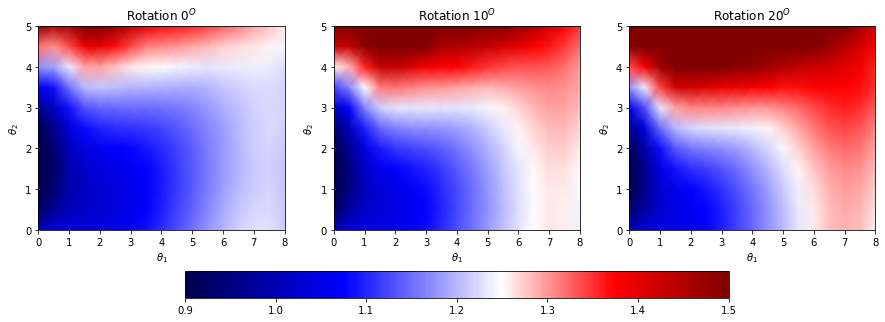

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
div_norm = colors.DivergingNorm(vmin=0.9, vcenter=1.25, vmax=1.5)
theta1 = np.arange(0, 8.1, step = 0.5)
theta2 = np.arange(0, 5.1, step= 0.5)
T2, T1 = np.meshgrid(theta2, theta1)

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = [15, 5])
b = np.load('data/test_stat_0.npy')
im0 = ax[0].pcolormesh(T1, T2, b, shading='gouraud', norm = div_norm, cmap = 'seismic')
#ax0.contour(T2, T1, b, labels = [1.25,])
ax[0].set_title('Rotation $0^O$')
ax[0].set_xlabel('$\\theta_1$')
ax[0].set_ylabel('$\\theta_2$')
#fig.colorbar(im0, ax=ax0)
b = np.load('data/test_stat_10.npy')
im1 = ax[1].pcolormesh(T1, T2, b, shading='gouraud', norm = div_norm, cmap = 'seismic')

ax[1].set_title('Rotation $10^O$')
ax[1].set_xlabel('$\\theta_1$')
ax[1].set_ylabel('$\\theta_2$')
#fig.colorbar(im1, ax=ax1)
b = np.load('data/test_stat_20.npy')
im2 = ax[2].pcolormesh(T1, T2, b, shading='gouraud', norm = div_norm, cmap = 'seismic')
ax[2].set_title('Rotation $20^O$')
ax[2].set_xlabel('$\\theta_1$')
ax[2].set_ylabel('$\\theta_2$')
fig.colorbar(im2, ax = ax, orientation='horizontal', fraction = 0.1)

In [9]:
a = np.load('data/test_stat_0.npy')
a

array([[1.        , 0.91765649, 0.86832095, 0.85089244, 0.86281901,
        0.90193782, 0.96705961, 1.05799841, 1.17523039, 1.31937552,
        1.4907173 ],
       [1.03474202, 0.97522338, 0.93821226, 0.92389343, 0.93201213,
        0.96223138, 1.01442294, 1.08850596, 1.18450842, 1.30309432,
        1.44561719],
       [1.04463368, 1.00981641, 0.99249101, 0.99059692, 1.00528788,
        1.03748123, 1.08697247, 1.15256556, 1.2350891 , 1.33729368,
        1.46100463],
       [1.04233173, 1.02196827, 1.01676689, 1.02495624, 1.04541553,
        1.08047634, 1.13210083, 1.20302045, 1.29198626, 1.39452675,
        1.50750632],
       [1.04406621, 1.02987729, 1.02860859, 1.04004963, 1.06352251,
        1.09773201, 1.14604604, 1.21002423, 1.29360202, 1.40259189,
        1.53298311],
       [1.05270477, 1.04090025, 1.03982691, 1.04995905, 1.07208023,
        1.10575994, 1.1487875 , 1.20511847, 1.27836983, 1.36687861,
        1.47909746],
       [1.06699177, 1.0560873 , 1.05398004, 1.06132961, 1.

In [94]:
T1, T2

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4., 4., 4., 4., 4.]]),
 array([[0., 1., 2., 3., 4., 5., 6., 7., 8.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8.]]))

In [42]:
theta1 = np.array([0, 0.01, 0.05, 0.1, 0.25, 0.5, 1, 1.5, 2])
theta2 = np.array([0, 0.01, 0.05, 0.1, 0.25, 0.5, 1, 1.5, 2])
T1, T2 = np.meshgrid(theta1, theta2)

In [43]:
T1

array([[0.  , 0.01, 0.05, 0.1 , 0.25, 0.5 , 1.  , 1.5 , 2.  ],
       [0.  , 0.01, 0.05, 0.1 , 0.25, 0.5 , 1.  , 1.5 , 2.  ],
       [0.  , 0.01, 0.05, 0.1 , 0.25, 0.5 , 1.  , 1.5 , 2.  ],
       [0.  , 0.01, 0.05, 0.1 , 0.25, 0.5 , 1.  , 1.5 , 2.  ],
       [0.  , 0.01, 0.05, 0.1 , 0.25, 0.5 , 1.  , 1.5 , 2.  ],
       [0.  , 0.01, 0.05, 0.1 , 0.25, 0.5 , 1.  , 1.5 , 2.  ],
       [0.  , 0.01, 0.05, 0.1 , 0.25, 0.5 , 1.  , 1.5 , 2.  ],
       [0.  , 0.01, 0.05, 0.1 , 0.25, 0.5 , 1.  , 1.5 , 2.  ],
       [0.  , 0.01, 0.05, 0.1 , 0.25, 0.5 , 1.  , 1.5 , 2.  ]])

In [44]:
T2

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
       [0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ],
       [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 , 1.5 ],
       [2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ]])

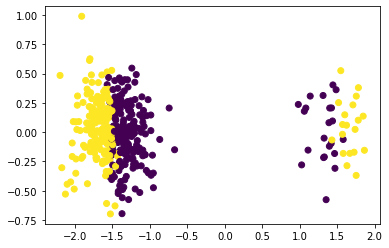

In [17]:

import numpy as np
import matplotlib.pyplot as plt
x = np.load('data/x.npy')
y = np.load('data/y.npy')
plt.scatter(x[:, 0], x[:, 1], c= y)

In [87]:
b, c = np.array([1, 2]), np.array([0, 1])
np.sum(b * c)

2

In [88]:
b* c

array([0, 2])

In [4]:
theta = np.array([1, 1])
x_full = np.load('data/x.npy')
y_full = np.load('data/y.npy')
a = x_full @ (theta.reshape((-1, 1)))
a

array([[-0.99370552],
       [-2.30057019],
       [-2.21806553],
       [-1.00819757],
       [ 1.53483436],
       [-1.79901639],
       [ 1.14676422],
       [-1.48306091],
       [-2.02514331],
       [-1.18748552],
       [-1.47794773],
       [-0.79795747],
       [ 1.60856405],
       [ 0.97067017],
       [ 1.63123369],
       [-2.04420714],
       [ 0.73381083],
       [-1.84195536],
       [-1.94144733],
       [-0.29907683],
       [-2.03973226],
       [-1.02735185],
       [-1.79309395],
       [ 2.64558531],
       [-1.13131897],
       [-1.52603976],
       [-2.24593046],
       [-1.31113552],
       [ 2.38504275],
       [-0.91463576],
       [ 1.74923511],
       [-1.39258151],
       [-1.29352678],
       [ 2.8257231 ],
       [-1.10546046],
       [ 0.52571017],
       [-0.981897  ],
       [-2.35328313],
       [ 1.76088531],
       [-1.00394704],
       [-1.71154311],
       [-1.20169348],
       [-1.34134582],
       [-1.64654925],
       [-0.87434741],
       [-0

In [18]:
from scipy.optimize import minimize
def total_loss(b):
        #theta = theta.reshape((-1, 1))
    logits =  a.reshape((-1, )) + b
    return -np.sum(y_full * logits) + np.log( 1+ np.exp(logits))

def der_loss(b):
    logits =  a.reshape((-1, )) + b
    return - np.sum(y_full) + np.sum(np.exp(logits)/(1+np.exp(logits)))

def vec_loss(b0):
    return [total_loss(b) for b in b0]

def vec_der(b0):
    return [der_loss(b) for b in b0]

b0 = np.arange(-2, 2, 0.3)
def bisection(der_loss, b_start, b_end, tol = 1e-9):
    fs = der_loss(b_start)
    fe = der_loss(b_end)
    if np.sign(fs * fe) > 0 :
        raise TypeError('Both of them have same sign')
    else:
        count = 0
        while np.absolute(b_start - b_end) > tol:
            b_mid = (b_start + b_end)/2
            fm = der_loss(b_mid)
            if np.sign(fs * fm) > 0 :
                b_start = b_mid
                fs = der_loss(b_start)
            else:
                b_end = b_mid
                fe = der_loss(b_end)
            count += 1
        print(f'Number of iterations {count}\nWith derivative {fs}')
        return b_start
bisection(der_loss, -2, 2)

Number of iterations 32
 With derivative -1.902452595459181e-08


1.0990181481465697